# Initialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from os.path import join

In [2]:
sns.set_context('talk')
sns.set_palette('muted', color_codes=True)

# Load Data

In [3]:
train = pd.read_pickle('train')

# Observations by year

In [258]:
train['year'] = train.Date.apply(lambda x: x.year)

In [259]:
train_by_year = train.groupby('year')

In [260]:
num_mos = []
wnv_percent = []

for year in train_by_year.groups.keys():
    num_mos.append(train.loc[train_by_year.groups[year]].NumMosquitos.sum())
    wnv_percent.append(
        train.loc[train_by_year.groups[year]].WnvPresent.sum() /
        train.loc[train_by_year.groups[year]].WnvPresent.count())

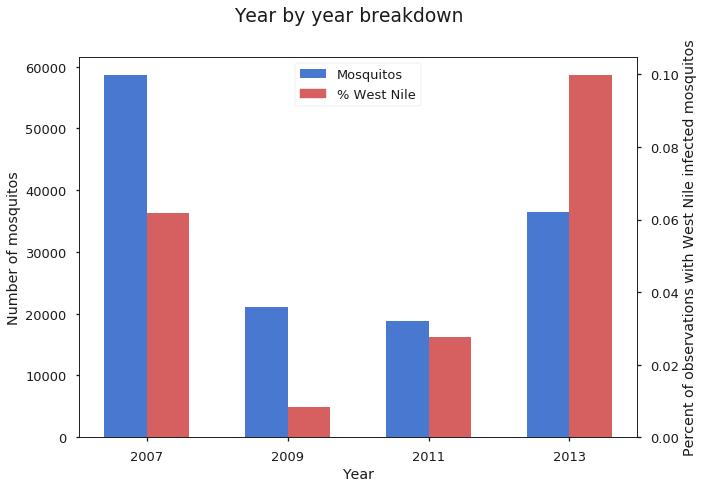

In [264]:
fig, ax = plt.subplots(figsize=(10, 7))

ax2 = ax.twinx()

bar1 = ax.bar(np.array(list(train_by_year.groups.keys())) - .3, num_mos, .6)

bar2 = ax2.bar(
    np.array(list(train_by_year.groups.keys())) + .3,
    wnv_percent,
    .6,
    color='r')

ax.set_xticks(list(train_by_year.groups.keys()))

ax.set_xlabel('Year')

ax.set_ylabel('Number of mosquitos')
ax2.set_ylabel('Percent of observations with West Nile infected mosquitos')

bars = bar1 + bar2
labs = ['Mosquitos', '% West Nile']
leg = ax.legend(bars, labs, loc=9)

leg.legendHandles[1].set_color('r')

fig.suptitle('Year by year breakdown')

plt.show()
fig.savefig(join('plots', 'years.png'))

# Observations by Month

In [266]:
train['month'] = train.Date.apply(lambda x: x.month)

In [267]:
train_by_month = train.groupby('month')

In [268]:
num_mos = []
wnv_percent = []

for month in train_by_month.groups.keys():
    num_mos.append(train.loc[train_by_month.groups[month]].NumMosquitos.sum())
    wnv_percent.append(
        train.loc[train_by_month.groups[month]].WnvPresent.sum() /
        train.loc[train_by_month.groups[month]].WnvPresent.count())

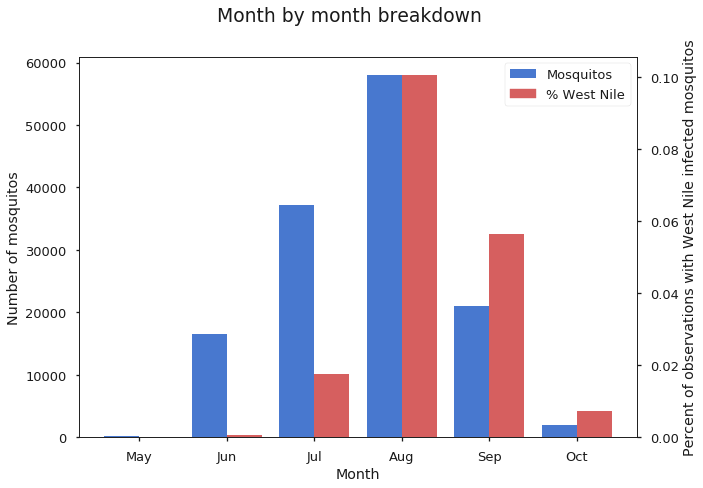

In [270]:
fig, ax = plt.subplots(figsize=(10, 7))

ax2 = ax.twinx()

bar1 = ax.bar(np.array(list(train_by_month.groups.keys())) - .2, num_mos, .4)

bar2 = ax2.bar(
    np.array(list(train_by_month.groups.keys())) + .2,
    wnv_percent,
    .4,
    color='r')

ax.set_xticks(list(train_by_month.groups.keys()))
ax.set_xticklabels(
    [calendar.month_abbr[x] for x in list(train_by_month.groups.keys())])

ax.set_xlabel('Month')

ax.set_ylabel('Number of mosquitos')
ax2.set_ylabel('Percent of observations with West Nile infected mosquitos')

fig.suptitle('Month by month breakdown')

bars = bar1 + bar2
labs = ['Mosquitos', '% West Nile']
leg = ax.legend(bars, labs, loc=0)

leg.legendHandles[1].set_color('r')

plt.show()
fig.savefig(join('plots', 'months.png'))

# Observations by day

In [271]:
train['day'] = train.Date.apply(lambda x: x.day)

In [272]:
train_by_day = train.groupby('day')

In [273]:
num_mos = []
wnv_percent = []

for day in train_by_day.groups.keys():
    num_mos.append(train.loc[train_by_day.groups[day]].NumMosquitos.sum())
    wnv_percent.append(
        train.loc[train_by_day.groups[day]].WnvPresent.sum() /
        train.loc[train_by_day.groups[day]].WnvPresent.count())

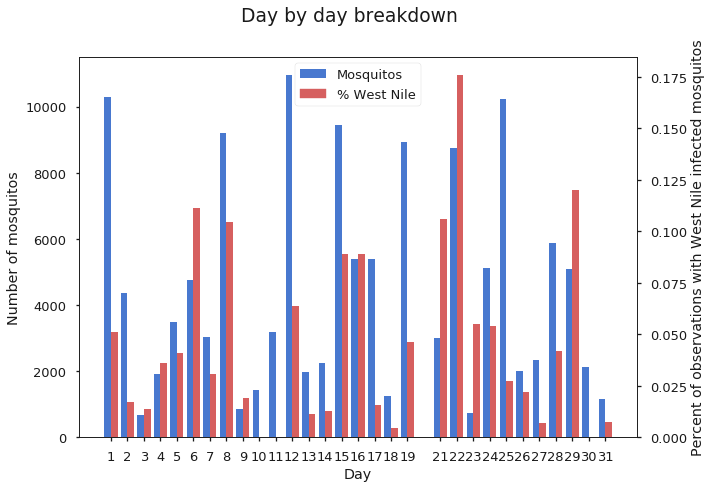

In [274]:
fig, ax = plt.subplots(figsize=(10, 7))

ax2 = ax.twinx()

bar1 = ax.bar(np.array(list(train_by_day.groups.keys())) - .2, num_mos, .4)

bar2 = ax2.bar(
    np.array(list(train_by_day.groups.keys())) + .2,
    wnv_percent,
    .4,
    color='r')

ax.set_xticks(list(train_by_day.groups.keys()))

ax.set_xlabel('Day')

ax.set_ylabel('Number of mosquitos')
ax2.set_ylabel('Percent of observations with West Nile infected mosquitos')

fig.suptitle('Day by day breakdown')

bars = bar1 + bar2
labs = ['Mosquitos', '% West Nile']
leg = ax.legend(bars, labs, loc=0)

leg.legendHandles[1].set_color('r')

plt.show()
fig.savefig(join('plots', 'days.png'))

# Repeated traps, number of mosquitos correlation

In [5]:
train_by_date_count = train[train.Species == 'CULEX PIPIENS/RESTUANS'].groupby(['Date', 'Trap'])

date_trap_count = train_by_date_count.size().to_frame(
    'TrapCount').reset_index()
date_trap_mosquitos = train_by_date_count.sum().NumMosquitos.reset_index()

date_trap_count_mosquitos = date_trap_count.merge(
    date_trap_mosquitos, on=['Date', 'Trap'])

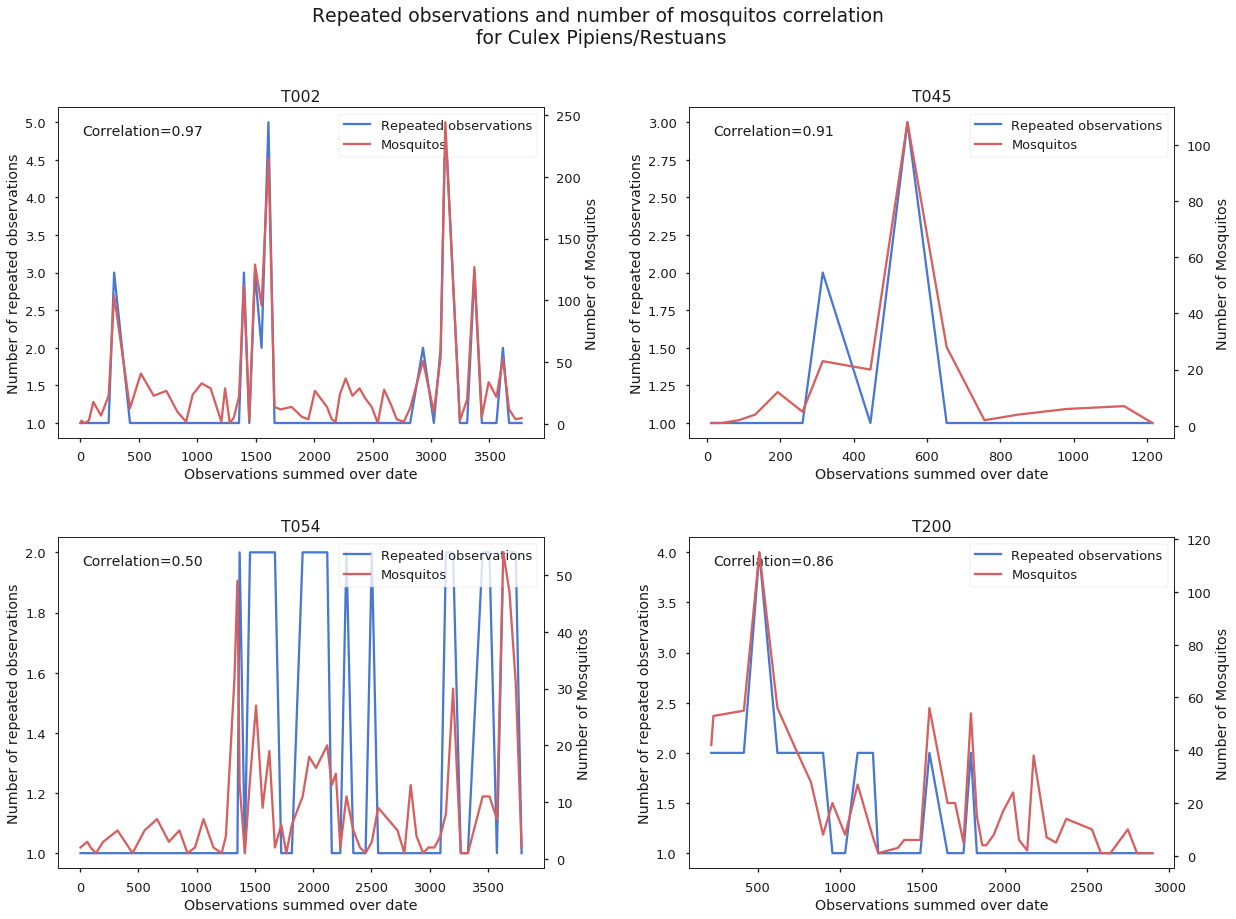

In [7]:
traps = ['T002', 'T045', 'T054', 'T200']
fig, ax = plt.subplots(
    2, 2, figsize=(20, 14), gridspec_kw={'wspace': .3,
                                         'hspace': .3})
axs = ax.flatten()

for i, trap in enumerate(traps):
    ax2 = axs[i].twinx()
    
    data = date_trap_count_mosquitos[date_trap_count.Trap == trap]

    ln1 = axs[i].plot(data.TrapCount)
    ln2 = ax2.plot(data.NumMosquitos, c='r')

    axs[i].text(
        0.05,
        0.95,
        f'Correlation={np.corrcoef(data.TrapCount, data.NumMosquitos)[0,1]:.2f}',
        fontsize=14,
        verticalalignment='top',
        transform=axs[i].transAxes)

    axs[i].set_ylabel('Number of repeated observations')
    axs[i].set_xlabel('Observations summed over date')

    ax2.set_ylabel('Number of Mosquitos')

    lns = ln1 + ln2
    labs = ['Repeated observations', 'Mosquitos']
    leg = axs[i].legend(lns, labs, loc=1)

    axs[i].set_title(trap)

fig.suptitle('Repeated observations and number of mosquitos correlation\n for Culex Pipiens/Restuans')

plt.show()
fig.savefig(join('plots', 'obsmoscorr.png'))

# Observations by Species

In [208]:
valid_species = ['CULEX PIPIENS/RESTUANS', 'CULEX PIPIENS', 'CULEX RESTUANS']

train_by_species = train[train.Species.isin(valid_species)].groupby('Species')

In [209]:
num_mos = train_by_species.NumMosquitos.sum().to_frame('Mosquitos')
wnv_percent = (train_by_species.WnvPresent.sum() /
               train_by_species.WnvPresent.count()).to_frame('% West Nile')

species_mos_wnv = num_mos.merge(wnv_percent, left_index=True, right_index=True)

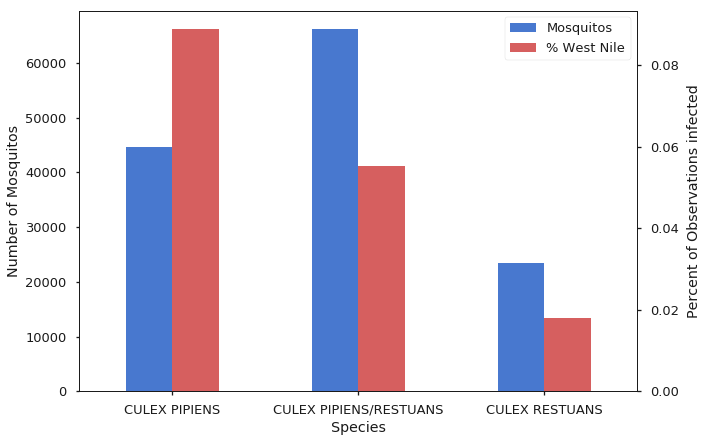

In [282]:
fig, ax = plt.subplots(figsize=(10, 7))

species_mos_wnv.plot(
    kind='bar',
    secondary_y=['% West Nile'],
    mark_right=False,
    color=['b', 'r'],
    ax=ax,
    rot=0)

ax.set_ylabel('Number of Mosquitos')
ax2 = ax.twinx()
ax2.get_yaxis().set_ticks([])
ax2.set_ylabel('Percent of Observations infected', labelpad=50)

plt.show()
fig.savefig(join('plots', 'species.png'))

# Observations by zone

In [11]:
train_by_zone = train.groupby('Zone')

In [22]:
num_mos = []
wnv_percent = []

for zone in train_by_zone.groups.keys():
    num_mos.append(train.loc[train_by_zone.groups[zone]].NumMosquitos.median())
    wnv_percent.append(
        train.loc[train_by_zone.groups[zone]].WnvPresent.sum() /
        train.loc[train_by_zone.groups[zone]].WnvPresent.count())

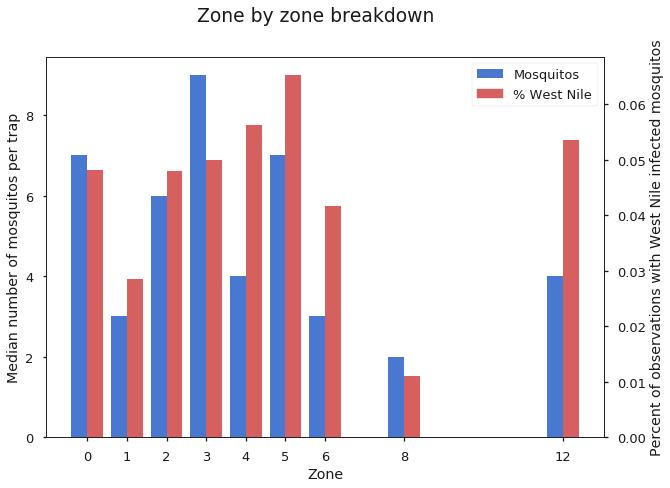

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))

ax2 = ax.twinx()

bar1 = ax.bar(np.array(list(train_by_zone.groups.keys())) - .2, num_mos, .4)

bar2 = ax2.bar(
    np.array(list(train_by_zone.groups.keys())) + .2,
    wnv_percent,
    .4,
    color='r')

ax.set_xticks(list(train_by_zone.groups.keys()))

ax.set_xlabel('Zone')

ax.set_ylabel('Median number of mosquitos per trap')
ax2.set_ylabel('Percent of observations with West Nile infected mosquitos')

fig.suptitle('Zone by zone breakdown')

bars = bar1 + bar2
labs = ['Mosquitos', '% West Nile']
leg = ax.legend(bars, labs, loc=0)

leg.legendHandles[1].set_color('r')

plt.show()
fig.savefig(join('plots', 'zones.png'))